### Neural Net Math Project Notebook

Group members: Akshay Sonawane, Yile Wang, and Luke Moraglia

This notebook is for our group project titled: Detecting Fake Instagram Accounts using Logistic Regression.
It implements a logistic regression algorithm from scratch using gradient descent. 
We demonstrate this implementation using a dataset that contains many features of Instagram accounts, with about half of the accounts being real people and half being fake or "bot" accounts. The goal is to classify accounts correctly. 

The data are sourced from here: https://www.kaggle.com/datasets/krpurba/fakeauthentic-user-instagram?select=user_fake_authentic_2class.csv.
We thank the authors who made this data publicly available. For more info, please see their paper:

K. R. Purba, D. Asirvatham and R. K. Murugesan, "Classification of instagram fake users using supervised machine learning algorithms," International Journal of Electrical and Computer Engineering (IJECE), vol. 10, no. 3, pp. 2763-2772, 2020.


#### Variable Names Explanation:
| Variable name | Feature name | Description|
|---|---|---|
|pos      | Num posts    | Number of total posts that the user has ever posted.|
|flg      | Num following | Number of following|
|flw      | Num followers | Number of followers|
|bl | Biography length | Length (number of characters) of the user's biography|
|pic | Picture availability | Value 0 if the user has no profile picture, or 1 if has|
|lin | Link availability | Value 0 if the user has no external URL, or 1 if has|
|cl | Average caption length | The average number of character of captions in media|
|cz | Caption zero | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length|
|ni | Non image percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel|
|erl | Engagement rate (Like) | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)|
|erc | Engagement rate (Comm.) | Similar to ER like, but it is for comments|
|lt | Location tag percentage | Percentage (0.0 to 1.0) of posts tagged with location|
|hc | Average hashtag count | Average number of hashtags used in a post|
|pr | Promotional keywords | Average use of promotional keywords in hashtag, i.e. {regrann, contest, repost, giveaway, mention, share, give away, quiz}|
|fo | Followers keywords | Average use of followers hunter keywords in hashtag, i.e. {follow, like, folback, follback, f4f}|
|cs | Cosine similarity | Average cosine similarity of between all pair of two posts a user has|
|pi | Post interval | Average interval between posts (in hours)|

The logistic probability model is

$ \hat{p}(s, \theta) = [1 + e^{-\hat{y}(s, \theta)}]^{-1} $

The $\hat{y}$ is defined as:

$ \hat{y}(s, \theta) = \theta^T [s^T 1]^T  $

The objective function is defined as

$ c([y,s], \theta) = - y  log\hat{p}(s, \theta) - (1-y)log(1-\hat{p}(s, \theta)) $

The loss function is

$ l_{n}(\theta) = -(1/n)\sum_{i=1}^{n} c([y,s], \theta) $

The gradient descent process is

$ \frac{dc_{i}}{d\theta} = -(y_i - \hat{y}_i) [s_i^{T}, 1] $ 

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]

In [2]:
# read the data
df_data = pd.read_csv("data/user_fake_authentic_2class.csv")
# training features size: 65326 x 17
data_x = df_data.iloc[:,:-1]

# label types: r=real and f=fake
data_y = df_data.iloc[:,-1:]
# convert to 0:fake, 1:real
data_y = data_y.replace({'class':{"r": 1, "f":0}})

data_y = np.array(data_y).flatten()

In [3]:
# normalize 
norm_x = preprocessing.normalize(data_x)
norm_x = pd.DataFrame(norm_x, columns=data_x.columns)
norm_x

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
0,0.132007,0.144008,0.975053,0.099005,0.003000,0.000000,0.036002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000333,0.000285
1,0.020912,0.138019,0.671273,0.313679,0.002091,0.000000,0.445424,0.000000,0.002091,0.030092,0.004120,0.000000,0.003137,0.0,0.000000,0.000433,0.481838
2,0.029645,0.871381,0.276686,0.090731,0.000898,0.000898,0.391672,0.000000,0.000898,0.009073,0.000269,0.000000,0.002246,0.0,0.000050,0.000514,0.039140
3,0.185676,0.228116,0.954904,0.037135,0.002653,0.000000,0.000000,0.002653,0.000000,0.002069,0.000159,0.000000,0.000000,0.0,0.000000,0.002653,0.015543
4,0.009690,0.067827,0.920511,0.235780,0.003230,0.000000,0.300377,0.000000,0.000000,0.046155,0.000000,0.002154,0.000000,0.0,0.000000,0.000971,0.000407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,0.006969,0.077732,0.344165,0.000000,0.000536,0.000000,0.003753,0.000247,0.000000,0.007650,0.000311,0.000000,0.000041,0.0,0.000000,0.000103,0.935621
65322,0.194071,0.892962,0.386950,0.043458,0.000298,0.000298,0.114299,0.000000,0.000116,0.002536,0.000039,0.000000,0.000480,0.0,0.000000,0.000051,0.016261
65323,0.292853,0.722370,0.624752,0.028700,0.000195,0.000195,0.025185,0.000000,0.000022,0.001833,0.000061,0.000141,0.000000,0.0,0.000011,0.000012,0.025342
65324,0.137409,0.626483,0.751780,0.091049,0.000418,0.000418,0.121120,0.000023,0.000000,0.002652,0.000109,0.000093,0.000209,0.0,0.000000,0.000043,0.022304


In [4]:
# define a class for logistic regression

"""
In our logistic regression model, there are several parameters need to be pre-defined:
    1. gamma, learning rate
    2. max_iters, the iteration number for the gradient descent
    3. data_x, the training dataset
    4. data_y, the prediction outcome
"""

class Modeling:

    def __init__(self, theta, gamma = 0.0001, max_iters = 1000):
        self.gamma = gamma
        self.max_iters = max_iters
        self.theta = theta
        self.grad = None
    

    def _S_one(self, data_x):
        data_x_yhat = data_x
        data_x_yhat["y_hat"] = np.ones(len(data_x.index))
        return data_x_yhat
    
    def _y_hat(self, S):
        return self._logistic(np.dot(S, self.theta))
            
    def _cost_function(self, S, y):
        y_hat = self._y_hat(S)
        c = (np.log(y_hat)*-y - (1-y)* np.log(1-y_hat))
        return c
        
    def _loss_func(self, S, data_y):
        c = self._cost_function(S, data_y)
        return np.mean(c)

    
    def _gradient_descent_func(self, S, y):
        y_hat = self._y_hat(S)
        return np.dot(S.transpose(), (y_hat - y))
    
    def _gradient_iteration(self, S, data_y):
        d_loss = 1/len(data_y) * self._gradient_descent_func(S, data_y)
        return d_loss

    def _gradient_descent(self, S, data_y, S_test = None, data_y_test = None):
    
        # gradient descent
        grad = []
        loss = []
        loss_test = []
        thetas = []
        t = 0
        gradnorm = np.inf
        while gradnorm >= 0.001 and t <= self.max_iters:
            stime = time.time()
            gt = self._gradient_iteration(S, data_y)
            self.theta = self.theta - self.gamma*gt
            gradnorm = np.max(np.abs(gt))
            lss = self._loss_func(S, data_y)
            grad.append(gradnorm)
            loss.append(lss)
            thetas.append(self.theta)
            if S_test is not None:
                lss_test = self._loss_func(S_test, data_y_test)
                loss_test.append(lss_test)
            t += 1
            etime = time.time()
            #print(f"it takes {etime - stime} for each loop")
            #print(f"the iteration {t}, grad is {gradnorm}, loss is {lss}")
        
        return grad, loss, thetas, loss_test
        
        
    def _logistic(self, x):
        return (1/(1+np.exp(-x)))

    def training(self, data_x, data_y, data_x_test = None, data_y_test = None):
        S = self._S_one(data_x)
        if data_x_test is not None:
            S_test = self._S_one(data_x_test)
        else:
            S_test = None
        grad, loss, thetas, loss_test = self._gradient_descent(S, data_y, S_test, data_y_test)
        return grad, loss, thetas, loss_test


    def fitting(self, data_x):
        S = self._S_one(data_x)
        y_hat_prob = self._y_hat(S)
        return y_hat_prob
    

In [5]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split(
    norm_x, data_y, test_size = .3, random_state=42,
    stratify = data_y)

In [6]:
def probs_to_binary_label(probs, threshold):
    return [1 if i > threshold else 0 for i in probs]

In [7]:
# model training process with training data
start = time.time()
# initiate the theta to all zeros
init_theta = np.zeros(len(df_data.columns))
# find the values
model_train = Modeling(theta = init_theta, gamma = 0.2, max_iters=10000)
grad_train, loss_train, thetas_train, loss_test = model_train.training(x_train, y_train, x_test, y_test)
y_hat_train_list = model_train.fitting(x_train)
y_hat_test_list = model_train.fitting(x_test)
y_hat_train_binary = probs_to_binary_label(y_hat_train_list, 0.5) 
y_hat_test_binary = probs_to_binary_label(y_hat_test_list, 0.5) 

end = time.time()
print(f"Time to train model and make train and test predictions: {round(end-start, 1)}s")


Time to train model and make train and test predictions: 94.7s


In [8]:
def accuracy(y, y_hat):
    accuracy = np.sum(np.equal(y, y_hat))/len(y)
    return accuracy

In [9]:
# Train and Test accuracy
print(f"Train data accuracy: {round(accuracy(np.array(y_train).flatten(), np.array(y_hat_train_binary)), 2)}")

print(f"Test data accuracy: {round(accuracy(np.array(y_test).flatten(), np.array(y_hat_test_binary)), 2)}")

Train data accuracy: 0.75
Test data accuracy: 0.74


In [10]:
# ROC AUC
roc_auc_train = roc_auc_score(y_train, y_hat_train_binary)
roc_auc_test = roc_auc_score(y_test, y_hat_test_binary)

print("ROC AUC Scores")
print(f"Train: {round(roc_auc_train, 2)}")
print(f"Test: {round(roc_auc_test, 2)}")

ROC AUC Scores
Train: 0.75
Test: 0.74


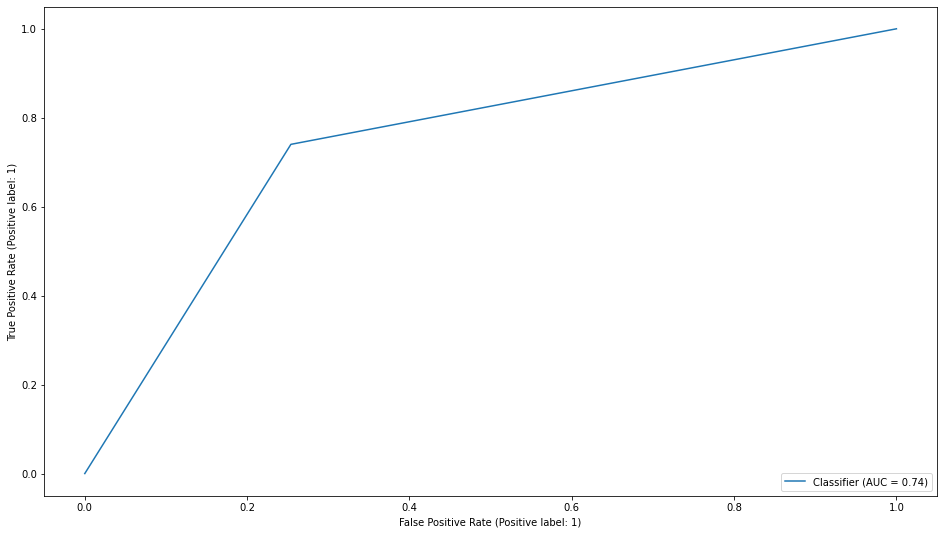

In [11]:
# ROC Graph
RocCurveDisplay.from_predictions(y_test, y_hat_test_binary)
plt.show()

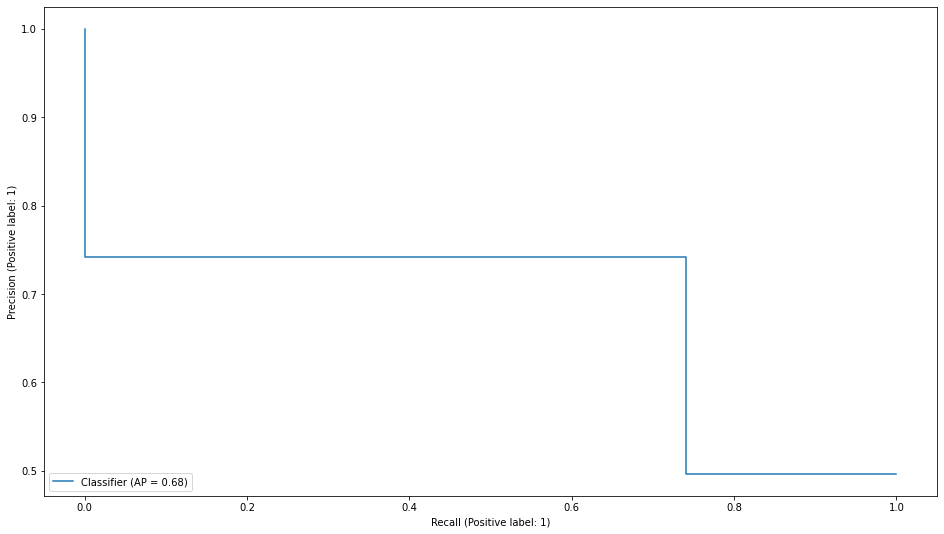

In [12]:
# Precision Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_hat_test_binary)
plt.show()

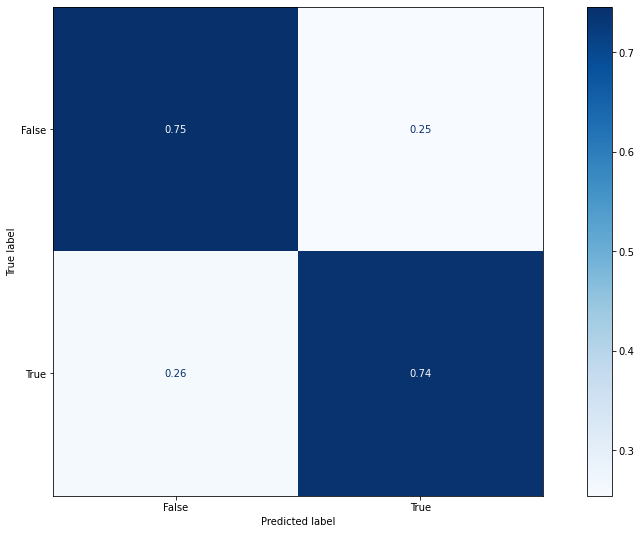

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_hat_test_binary, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

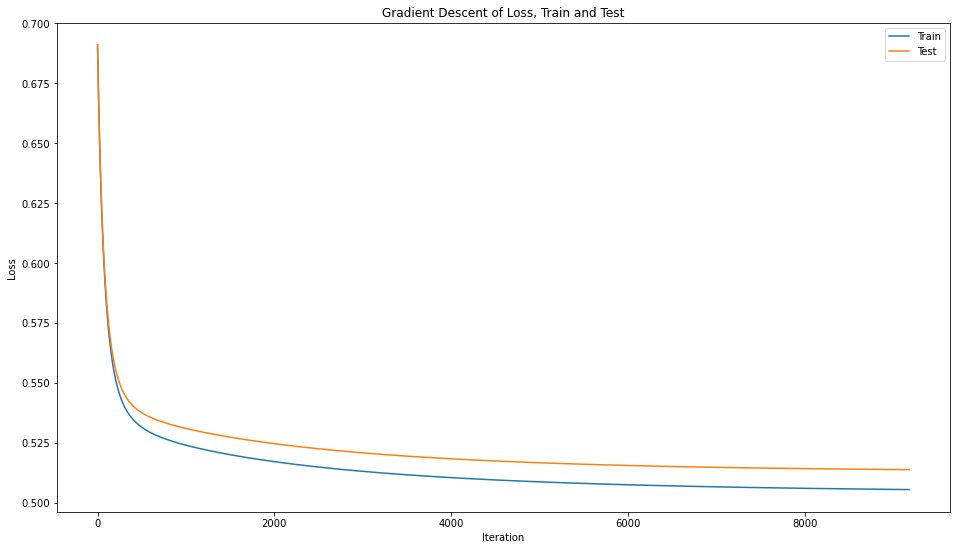

In [14]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(loss_train)
axes.plot(loss_test)
axes.set_xlabel("Iteration")
axes.set_ylabel("Loss")
axes.legend(["Train", "Test"])
plt.title("Gradient Descent of Loss, Train and Test")
plt.show()

In [15]:
def grad_desc_viz(grad, ylabel, title):
    # visualization the gradient descent
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(grad)
    axes.set_xlabel("Iteration")
    axes.set_ylabel(ylabel)
    plt.title(title)
    plt.show()

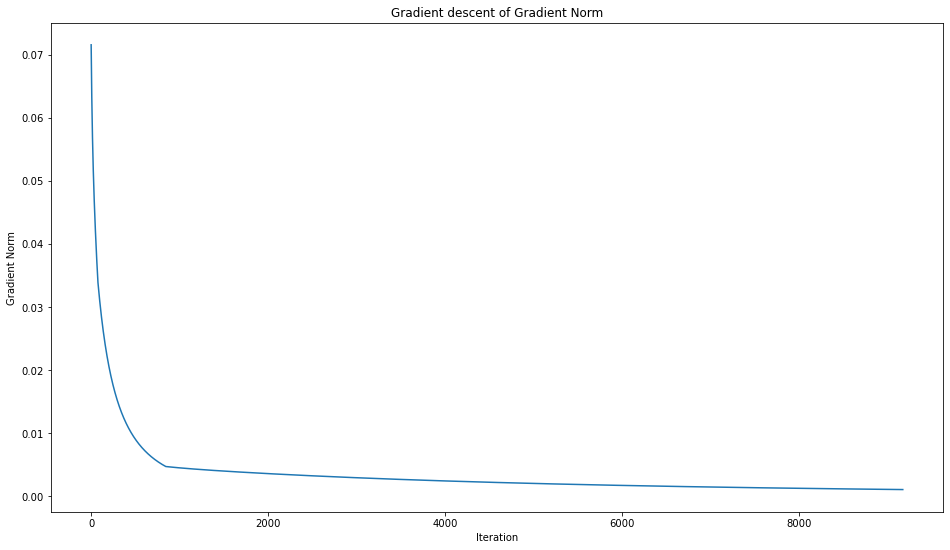

In [16]:
grad_desc_viz(grad_train, ylabel = "Gradient Norm", title="Gradient descent of Gradient Norm")

In [17]:
# Final thetas after gradient descent
pd.Series(model_train.theta.flatten(), index = norm_x.columns.tolist() + ["intercept"])

pos          0.006118
flw          3.663769
flg         -0.564321
bl           4.772799
pic         -0.289429
lin          0.067073
cl           0.252726
cz          -0.060825
ni           0.014263
erl          3.038090
erc          0.521908
lt           0.037892
hc           0.036824
pr          -0.021592
fo          -0.009359
cs          -0.434701
pi           2.454426
intercept   -1.652263
dtype: float64